# Early Detection and Dignostic Insights - Part 5 Project Code and Descriptions

## CSPB4502 group7

Carolina Perez(cape5274@colorado.edu)

Cody Folgman (cody.folgmann@colorado.edu)

Dain Kim (dain.kim@colorado.edu)

## Overview
This project aims to predict the presence of a brain tumor based on various features, such as age, tumor size, genetic risk, and blood pressure. The dataset contains information on several patients, and the goal is to use machine learning models to classify whether a patient has a brain tumor or not.

The project is divided into the following sections:

1. **Data Preprocessing**: This includes cleaning and preparing the dataset for machine learning.
2. **Visualization**: This section covers exploratory data analysis (EDA) with visualizations to understand the relationships between features and the target variable.
3. **Modeling**: This involves training a Random Forest classifier to predict brain tumor presence.
4. **Model Evaluation**: We will evaluate the model's performance using confusion matrices, classification reports, and cross-validation.

---


## Project Overview

Cancer survival outcomes can be significantly improved with early detection and accurate diagnostics. 
In this project, we aim to predict **cancer survival probabilities** using **clinical and demographic data** 
such as tumor size, blood pressure, age, and genetic risk factors.  
We use machine learning techniques to model the relationships between early detection factors 
and patient outcomes, assisting healthcare professionals in making informed treatment decisions.

The dataset used is the [Brain Tumor Prediction Dataset](https://www.kaggle.com/datasets/ankushpanday1/brain-tumor-prediction-dataset) from Kaggle, containing approximately **250,000 data points across 22 attributes**.

## Import Libraries

To get started, we need to import the necessary libraries for data processing, model building, and visualization.

Pandas is used for data manipulation and analysis, and NumPy is supported for large arrays and matrices. 
Matplotlib.pyplot and Seaborn are used for data visualisation, RandomForestClassifier from sklearn.ensemble is used in the machine learning model for classification and sklearn.model_selection and sklearn.metrics are utilised for model evaluation and validation.


In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Data Preprocessing

Before analyzing the data or building predictive models, we need to preprocess the dataset. This involves cleaning, encoding categorical variables, and preparing features for machine learning.

In this section, we will clean and preprocess the data to make it ready for modeling. We will:
- Extract relevant features from the dataset.
- Handle categorical data by encoding it as numerical values.
- Select relevant features for prediction and separate them into input features (`X`) and the target variable (`y`).

In [30]:
# Load dataset
df = pd.read_csv("Brain_Tumor_Prediction_Dataset.csv")


# Extract Systolic Blood Pressure (the first number before '/')
df['Systolic_BP'] = df['Blood_Pressure'].str.split('/').str[0].astype(float)

# Encode 'Brain_Tumor_Present' ('Yes' -> 1, 'No' -> 0)
df['Brain_Tumor_Present'] = df['Brain_Tumor_Present'].map({'Yes': 1, 'No': 0})

# Select features for prediction
features = ['Age', 'Tumor_Size', 'Genetic_Risk', 'Systolic_BP']
X = df[features]
y = df['Brain_Tumor_Present']  # Target variable: tumor presence (yes/no)


# Convert categorical variables to numerical where necessary 
#The Brain_Tumor_Present column contains categorical values: "Yes" and "No", which are not directly usable for machine learning algorithms.
df["Brain_Tumor_Present"] = df["Brain_Tumor_Present"].map({"Yes": 1, "No": 0})

# Preview the dataset
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present,Systolic_BP
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,NaN,122.0
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,NaN,126.0
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,NaN,118.0
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,NaN,165.0
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,NaN,156.0


The systolic pressure is typically used to indicate the force of blood flow when the heart beats. By splitting the string at the '/' symbol and taking the first part (the systolic value), we're converting it into a numerical feature, making it usable for machine learning algorithms.This is a common practice in data preprocessing, as most machine learning models, including the Random Forest, expect numerical input for both features and target variables. Encoding allows the model to learn the relationship between the features and the outcome (whether or not the brain tumor is present).

# Visualization

In this section, we will perform Exploratory Data Analysis (EDA) by visualizing various aspects of the dataset. We will create the following visualizations:

1. **Correlation Heatmap**: To observe the relationships between tumor characteristics (such as Tumor Size, Genetic Risk, Systolic Blood Pressure) and the target variable, `Brain_Tumor_Present`.
2. **Feature Importance Visualization**: To see which features are most important in predicting brain tumor presence.
3. **Tumor Size Distribution by Tumor Presence**: To visualize the distribution of tumor sizes for patients with and without a tumor.


## 1. Correlation Heatmap

A heatmap will be created to show the correlation between tumor characteristics (such as Tumor Size, Genetic Risk, Systolic Blood Pressure, and the target variable `Brain_Tumor_Present`).

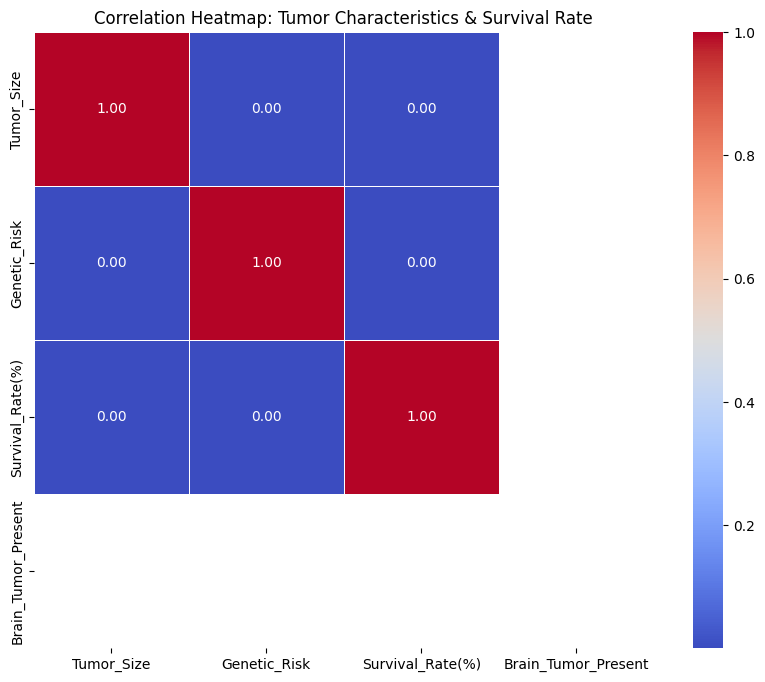

In [31]:
plt.figure(figsize=(10, 8))
corr_matrix = df[["Tumor_Size", "Genetic_Risk", "Survival_Rate(%)", "Brain_Tumor_Present"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Tumor Characteristics & Survival Rate")
plt.show()


## 2. Feature Importance Visualization

A feature importance plot will be generated to show which features (such as Age, Tumor Size, Genetic Risk, and Systolic BP) are most important in predicting brain tumor presence.

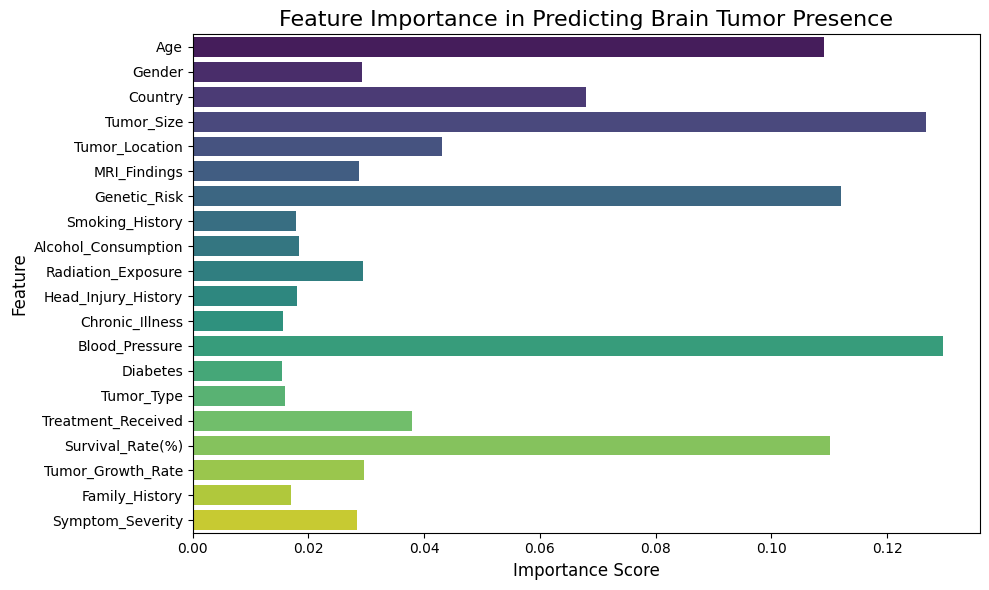

In [35]:
# Load dataset
df = pd.read_csv("Brain_Tumor_Prediction_Dataset.csv")
df['Brain_Tumor_Present'] = df['Brain_Tumor_Present'].map({'Yes': 1, 'No': 0})
df_encoded = df.copy()

# Encode categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(columns=["Brain_Tumor_Present"])
y = df_encoded["Brain_Tumor_Present"]

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in Predicting Brain Tumor Presence", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()



## 3. Tumor Size Distribution by Tumor Presence

This visualization will display the distribution of tumor sizes for patients with and without a brain tumor.


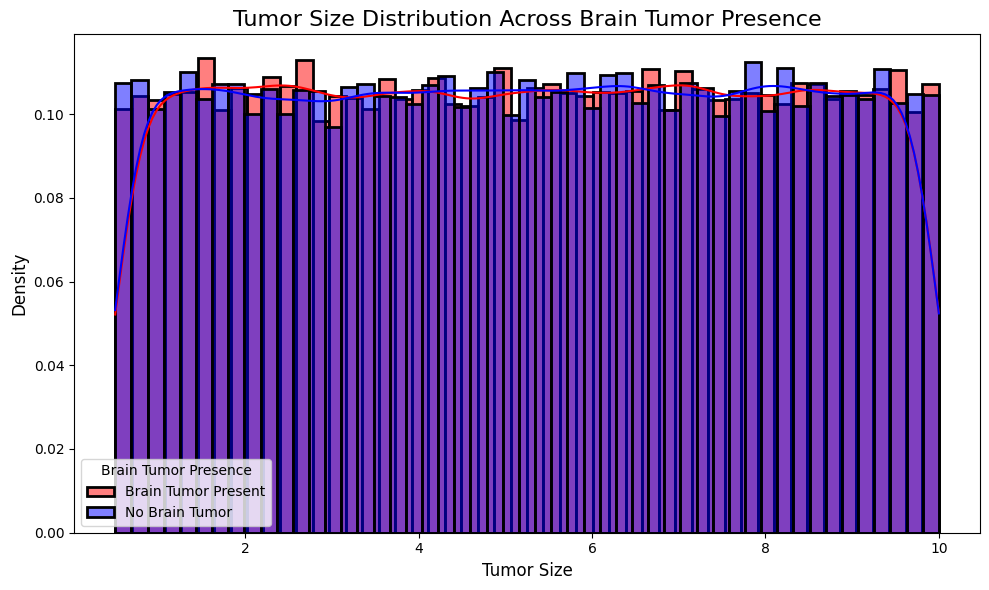

In [33]:
# Plot tumor size distributions for both classes (Tumor Present and Tumor Absent)
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Brain_Tumor_Present"] == 1]["Tumor_Size"], kde=True, color="red", label="Brain Tumor Present", stat="density", linewidth=2)
sns.histplot(df[df["Brain_Tumor_Present"] == 0]["Tumor_Size"], kde=True, color="blue", label="No Brain Tumor", stat="density", linewidth=2)

# Add titles and labels
plt.title("Tumor Size Distribution Across Brain Tumor Presence", fontsize=16)
plt.xlabel("Tumor Size", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Brain Tumor Presence")
plt.tight_layout()
plt.show()


# Modeling

In this section, we will build a **Random Forest** classifier model to predict the presence of a brain tumor based on the features we selected earlier. The process will include training the model, making predictions, and evaluating its performance.

## 1. Training a Random Forest Model

We will train a Random Forest Classifier using the preprocessed data. The Random Forest model is a powerful ensemble learning method, known for handling complex datasets and capturing non-linear relationships.

In [36]:
from sklearn.model_selection import train_test_split

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 2. Model Evaluation

### Cross-Validation

Cross-validation helps in understanding how well our model generalizes to unseen data. We will use 5-fold cross-validation to evaluate the Random Forest classifier's performance.
To valuates a classification model (rf_model) by first making predictions on a separate test set and then reporting its performance through a confusion matrix and a classification report (precision, recall, F1-score). To get a more reliable estimate of the model's generalization ability, it also performs 5-fold cross-validation on the entire dataset and prints the average of the resulting scores, providing a more robust measure of how well the model is likely to perform on unseen data.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Predictions
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform cross-validation (5-fold)
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Display average cross-validation score
print("\nAverage Cross-Validation Score:", np.mean(cv_scores))


Confusion Matrix:
[[20223 17174]
 [20356 17247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     37397
           1       0.50      0.46      0.48     37603

    accuracy                           0.50     75000
   macro avg       0.50      0.50      0.50     75000
weighted avg       0.50      0.50      0.50     75000

